# Operações espaciais no processamento de imagens

- Filtros Lineares
    - Filtering Noise
    - Gaussian Blur
    - Image Sharpening
- Edges
- Median

In [66]:
# Used to view the images
import matplotlib.pyplot as plt
# Used to load an image
from PIL import Image, ImageFilter
# Used to create kernels for filtering
import numpy as np

In [67]:
#plotando duas imagens lado a lado
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2)
    plt.title(title_2)
    plt.show()

### Filtros Lineares

A Convolução é um tipo de filtro de imagem. O filtro é chamado de kernel e kernels diferentes realizam tarefas diferentes. Além disso, a Convolução é usada para muitos dos algoritmos de inteligência artificial mais avançados. Simplesmente pegamos o produto escalar do kernel e uma porção de tamanho igual da imagem. Então, deslocamos o kernel e repetimos.


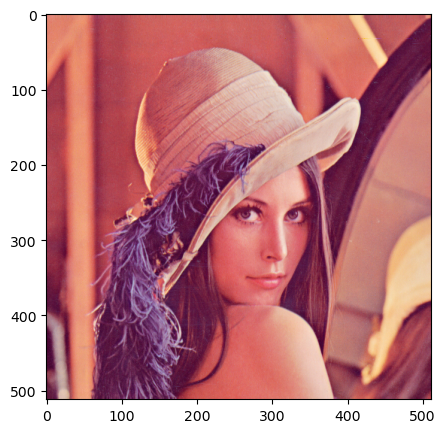

In [68]:
# Carregando e renderizando a imagem
image = Image.open("./img/lenna.png")
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

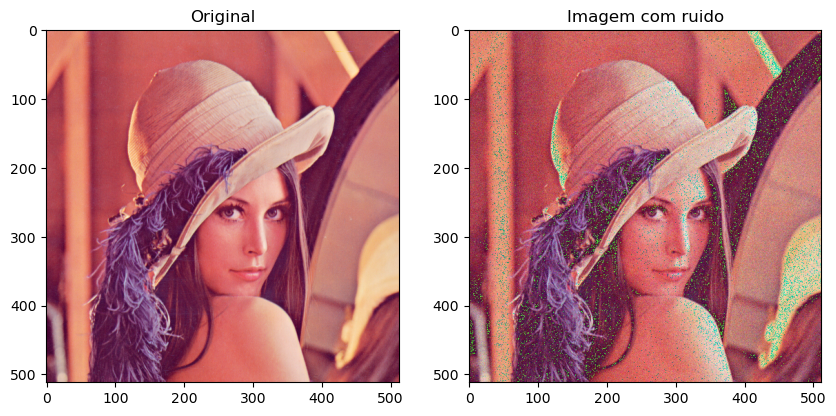

In [69]:
#linhas e colunas da imagem
rows, cols = image.size

# Cria valores usando uma distribuição normal com média de 0 e desvio padrão de 15, 
# os valores são convertidos para unidade8, o que significa que os valores estão entre 0 e 255
noise = np.random.normal(0,15,(rows,cols, 3)).astype(np.uint8)

#adicionando o ruido na imagem
noise_img = image + noise

#transformando em PIL
noise_img = Image.fromarray(noise_img)

plot_image(image, noise_img, "Original", "Imagem com ruido")



Filtrando Ruidos

Os filtros de passa-baixa ou filtros de suavização fazem a media do pixels de vizinhança. Para filtragem média, o kernel simplesmente faz a média dos kernels em uma vizinhança.

In [70]:
#O Kernel é um array 5x5, com valores iguais a 1/36
kernel = np.ones((5,5))/36

#criando um objeto ImageFIlter cujo tamanho é igual ao Kernel porem sua dimensão é 1x 5, isto é, um kernel achatado
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

A função FIlter realiza a convolução entre uma imagem e kernel em cada canal de cores, de forma independente

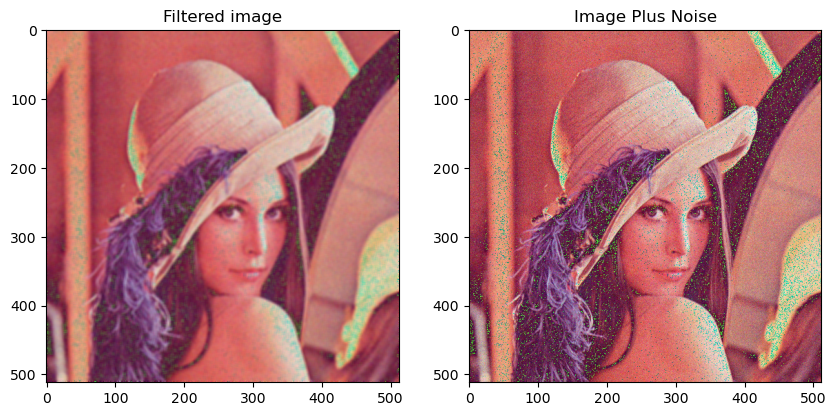

In [71]:
#filtrando a imagem a partir do kernel
imagem_filtrada = noise_img.filter(kernel_filter)

#plotando o resultado
plot_image(imagem_filtrada, noise_img,title_1="Filtered image",title_2="Image Plus Noise")

Um kernel menor mantém a imagem mais nítida, mas filtra menos o ruído. Aqui, experimentamos um kernel de 3x3.

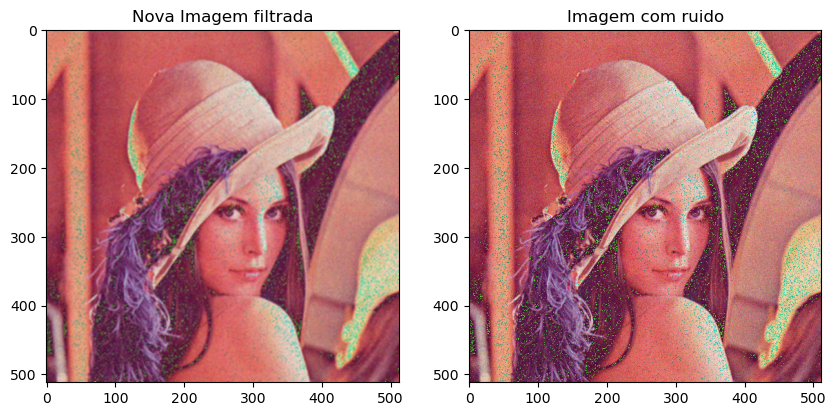

In [72]:
#novo kernel de dimensão 3x3
kernel = np.ones((3,3))/36

#criando um objeto ImageFIlter cujo tamanho é igual ao Kernel porem sua dimensão é 1x 5, 
# isto é, um kernel achatado
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())

#imagem filtrada a partir do novo kernel
imagem_filtrada = noise_img.filter(kernel_filter)

#plotando o novo resultado
plot_image(imagem_filtrada, noise_img, "Nova Imagem filtrada", "Imagem com ruido")


Há mais definição neste resultado, porém o ruido verde se encontra mais acentuado do que no resultado anterior

### Desfoque Gaugassiano

 image using the predefined filter `ImageFilter.GaussianBlur`

Parameters

<p><code>radius</code>: blur kernel radius, default 2</p>


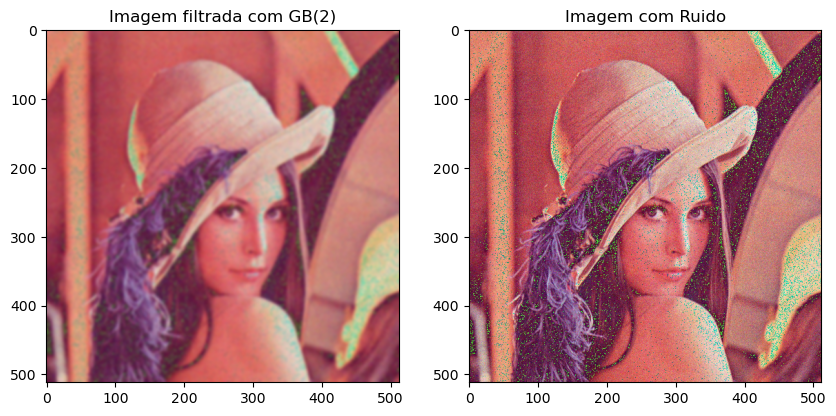

In [73]:
#aplicando o desfoque gaugassiano
imagem_filt_gaugas = noise_img.filter(ImageFilter.GaussianBlur)

plot_image(imagem_filt_gaugas, noise_img, "Imagem filtrada com GB(2)", "Imagem com Ruido")

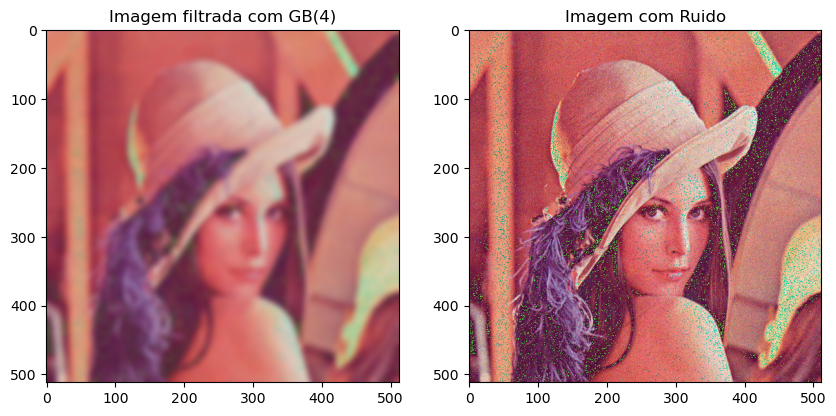

In [74]:
#filtrando a imagem com o kernel 4x4
imagem_filt_gaugas= noise_img.filter(ImageFilter.GaussianBlur(4))
# Plotando o novo resultado
plot_image(imagem_filt_gaugas, noise_img, "Imagem filtrada com GB(4)", "Imagem com Ruido")

### Nitidez

A nitidez de imagem envolve suavizar a imagem e calcular as derivadas. Podemos realizar a nitidez de imagem aplicando o seguinte Kernel.

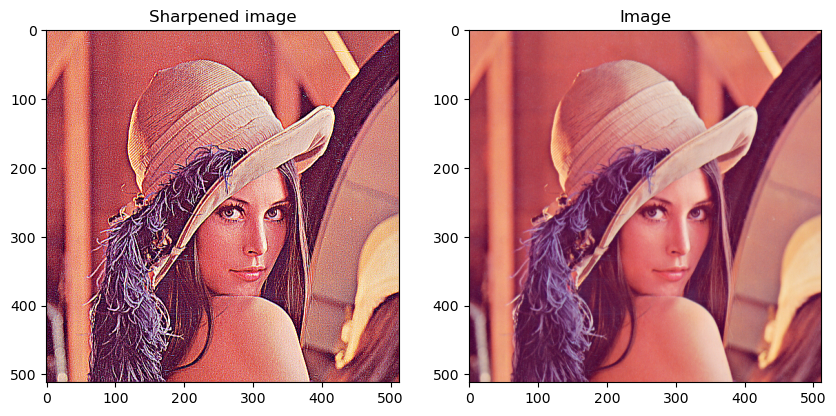

In [75]:
# kernel de nitides
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())
# Applys the sharpening filter using kernel on the original image without noise
sharpened = image.filter(kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title_2="Image")

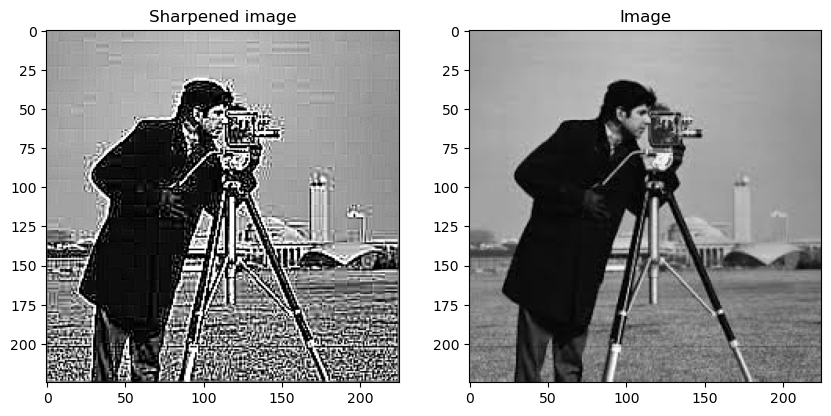

In [76]:
image_cam = Image.open("./img/cameraman.jpeg")

nitidez = image_cam.filter(kernel)
plot_image(nitidez , image_cam, title_1="Sharpened image",title_2="Image")


### Bordas

As bordas são onde as intensidades dos pixels mudam. O Gradiente de uma função produz a taxa de mudança; podemos aproximar o gradiente de uma imagem em tons de cinza com convolução. =

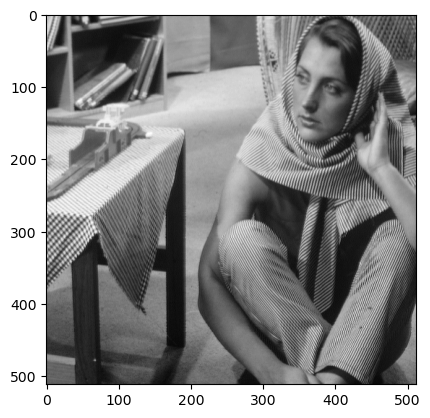

In [77]:
img_cinza = Image.open("./img/barbara.png")
plt.imshow(img_cinza, cmap="gray")
plt.show()

Acentuamos as bordas para que sejam melhor captadas quando usamos a detecção de bordas

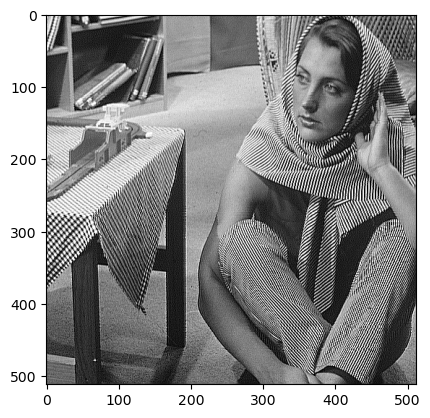

In [78]:
img_cinza = img_cinza.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(img_cinza, cmap="gray")
plt.show()

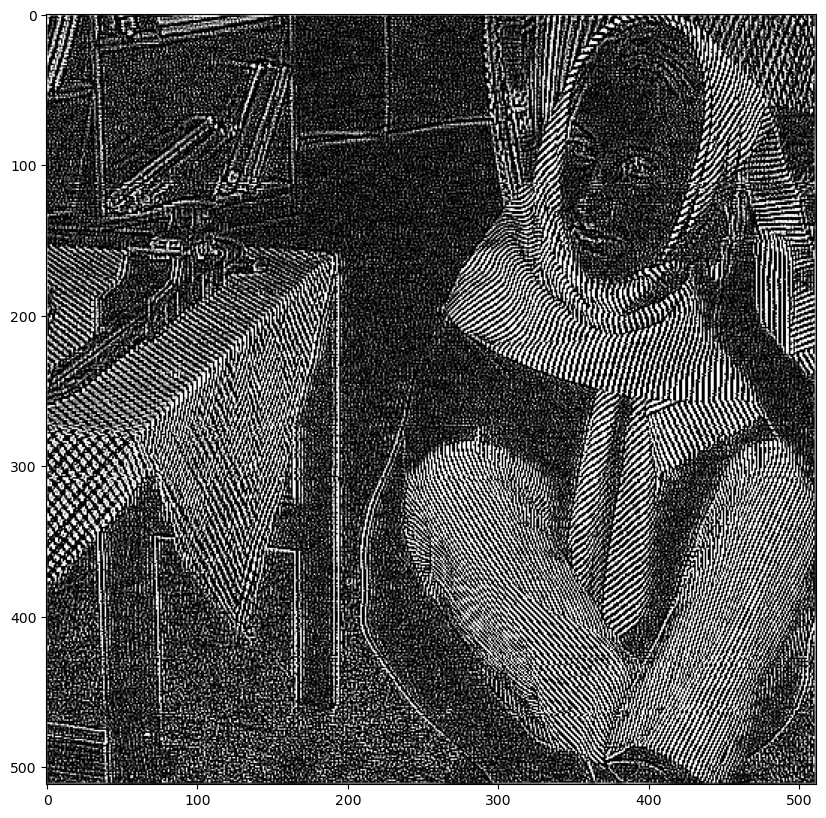

In [79]:
#Filtrando a imagem com o filtro FIND_EDGES
img_cinza = img_cinza.filter(ImageFilter.FIND_EDGES)

#Plotando o resultado
plt.figure(figsize=(10,10))
plt.imshow(img_cinza ,cmap='gray')
plt.show()

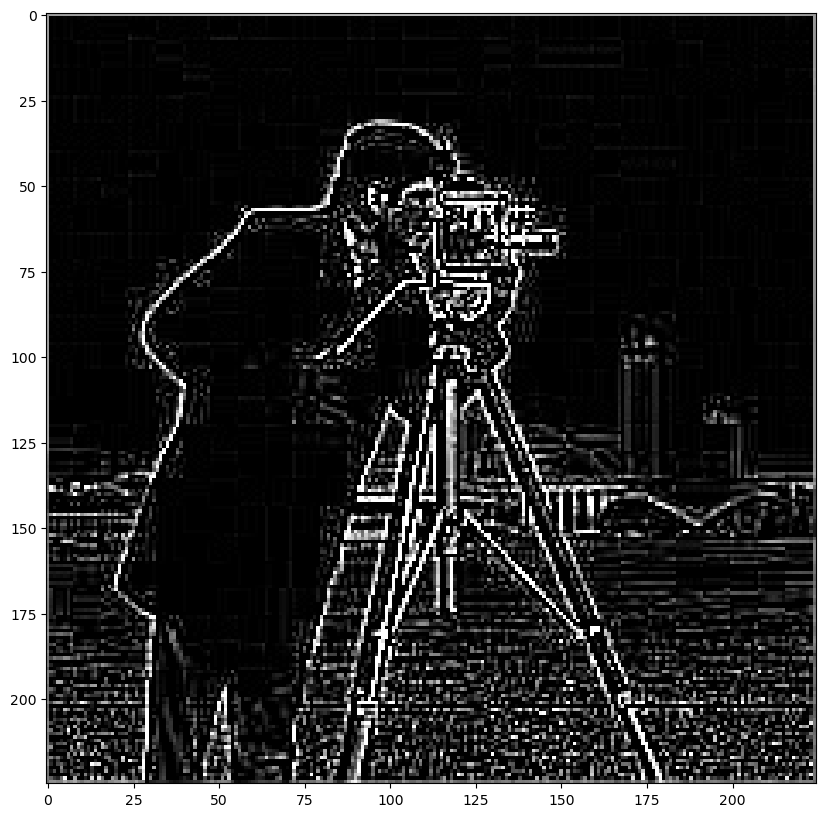

In [80]:
#Filtrando a imagem com o filtro FIND_EDGES
img_cam_cinza = Image.open("./img/cameraman.jpeg")
img_cam_cinza = img_cam_cinza.filter(ImageFilter.FIND_EDGES)

#Plotando o resultado
plt.figure(figsize=(10,10))
plt.imshow(img_cam_cinza ,cmap='gray')
plt.show()

### Median

Os filtros de mediana encontram a mediana de todos os pixels sob a área do kernel e o elemento central é substituído por esse valor mediano.

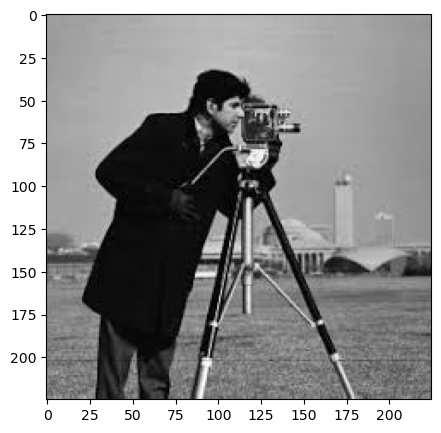

In [81]:
image_cam = Image.open("./img/cameraman.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(image_cam)
plt.show()

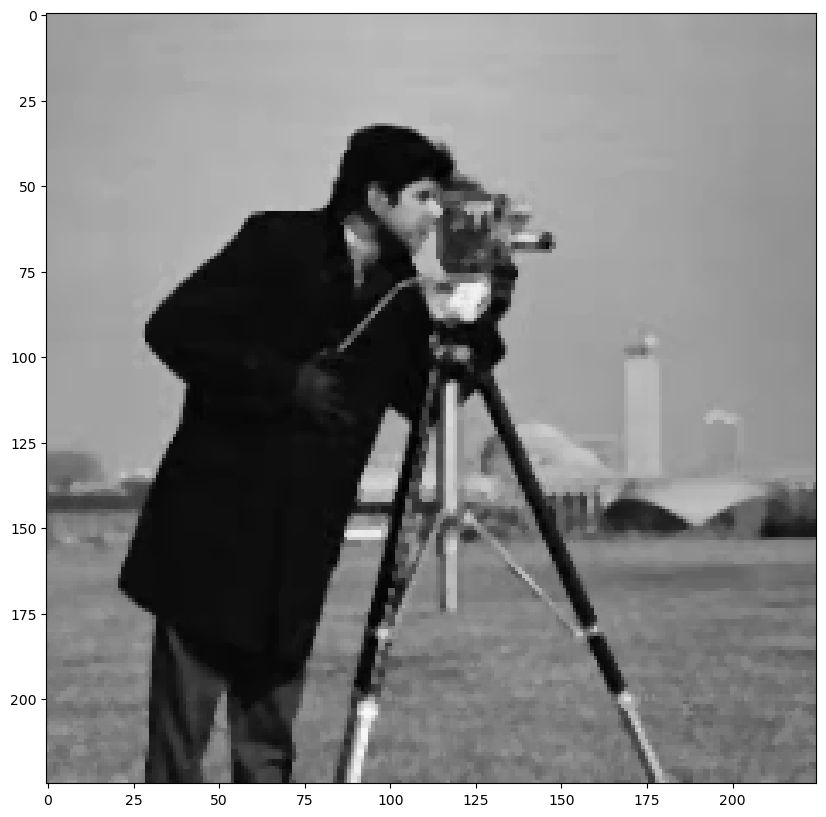

In [82]:
image_cam = image_cam.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
plt.imshow(image_cam)
plt.show()